In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import time
from NEF_WM import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [2]:
def bayes(empirical, stage):
    subdata = empirical.query("stage<=@stage")
    reds = subdata.query("color==1")['color'].size
    p_star = (reds+1)/(stage+2)
    expectation = 2*p_star-1
    return expectation

In [21]:
def run_WM_carrabin(sid, trial, n_neurons):
    empirical = pd.read_pickle(f"data/carrabin.pkl").query("sid==@sid & trial==@trial")
    columns = ['type', 'n_neurons', 'sid', 'trial', 'stage', 'delta N', 'delta E']
    dfs = []
    env = Environment(dataset="carrabin", sid=sid, trial=trial)
    seed_net = sid + 1000*trial
    net, sim = simulate_WM(env=env, n_neurons=n_neurons, seed_net=seed_net, z=0, progress_bar=False)
    for stage in env.stages:
        tidx = int((stage*env.T)/env.dt)-2
        number = sim.data[net.probe_number][tidx][0]
        expectation_NEF = sim.data[net.probe_memory][tidx][0]
        expectation_bayes = bayes(empirical, stage)
        delta_N = np.abs(number - stage) / stage
        delta_E = np.abs(expectation_NEF - expectation_bayes)
        df = pd.DataFrame([['NEF_WM', n_neurons, sid, trial, stage, delta_N, delta_E]], columns=columns)
        dfs.append(df)
    data = pd.concat(dfs, ignore_index=True)
    # data.to_pickle(f"data/NEF_WM_carrabin_{sid}_{trial}_{n_neurons}.pkl")
    return data

In [22]:
run_WM_carrabin(1, 1, 1000)

,type,n_neurons,sid,trial,stage,delta N,delta E
0,NEF_WM,1000,1,1,1,0.026864,0.027625
1,NEF_WM,1000,1,1,2,0.021896,0.012518
2,NEF_WM,1000,1,1,3,0.026182,0.005162
3,NEF_WM,1000,1,1,4,0.028327,0.022722
4,NEF_WM,1000,1,1,5,0.028380,0.008886


In [39]:
empirical = pd.read_pickle(f"data/carrabin.pkl")
sids = empirical['sid'].unique()[:1]
trials = empirical['trial'].unique()
n_neurons = [200, 400, 600, 800, 1000]

start = time.time()
dfs = []
for sid in sids:
    for trial in trials:
        for n in n_neurons:
            print(f"sid {sid}, trial {trial}, neurons {n}")
            dfs.append(run_WM_carrabin(sid, trial, n))
noise_data = pd.concat(dfs, ignore_index=True)
end = time.time()
print(f"runtime {(end-start)/60:.4} min")

sid 1, trial 1, neurons 200
sid 1, trial 1, neurons 400
sid 1, trial 1, neurons 600
sid 1, trial 1, neurons 800
sid 1, trial 1, neurons 1000
sid 1, trial 2, neurons 200
sid 1, trial 2, neurons 400
sid 1, trial 2, neurons 600
sid 1, trial 2, neurons 800
sid 1, trial 2, neurons 1000
sid 1, trial 3, neurons 200
sid 1, trial 3, neurons 400
sid 1, trial 3, neurons 600
sid 1, trial 3, neurons 800
sid 1, trial 3, neurons 1000
sid 1, trial 4, neurons 200
sid 1, trial 4, neurons 400
sid 1, trial 4, neurons 600
sid 1, trial 4, neurons 800
sid 1, trial 4, neurons 1000
sid 1, trial 5, neurons 200
sid 1, trial 5, neurons 400
sid 1, trial 5, neurons 600
sid 1, trial 5, neurons 800
sid 1, trial 5, neurons 1000
sid 1, trial 6, neurons 200
sid 1, trial 6, neurons 400
sid 1, trial 6, neurons 600
sid 1, trial 6, neurons 800
sid 1, trial 6, neurons 1000
sid 1, trial 7, neurons 200
sid 1, trial 7, neurons 400
sid 1, trial 7, neurons 600
sid 1, trial 7, neurons 800
sid 1, trial 7, neurons 1000
sid 1, trial 

In [40]:
noise_data.to_pickle("data/noise_carrabin.pkl")

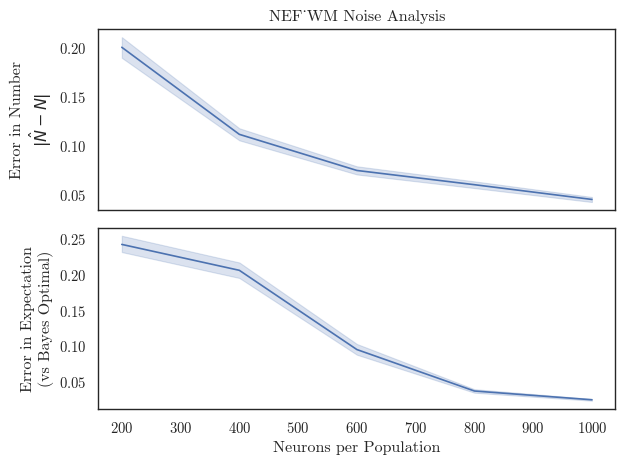

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
sns.lineplot(noise_data, x='n_neurons', y='delta N', ax=axes[0])
sns.lineplot(noise_data, x='n_neurons', y='delta E', ax=axes[1])
axes[0].set(ylabel='Error in Number\n'+r"$|\hat{N} - N|$", title='NEF_WM Noise Analysis')
axes[1].set(ylabel='Error in Expectation\n(vs Bayes Optimal)', xlabel='Neurons per Population')
plt.tight_layout()
plt.show()
fig.savefig("plots/NEF_WM_noise_analysis.jpg", dpi=600)

# Load and Plot

In [43]:
noise_data = pd.read_pickle("data/NEF_WM_noise_WM_carrabin_1_300_300.pkl")

In [44]:
noise_data

,type,n_number,n_working,sid,trial,stage,error number,error expectation
0,NEF_WM,300,300,1,1,1,0.202782,0.016727
1,NEF_WM,300,300,1,1,2,0.147112,0.011166
2,NEF_WM,300,300,1,1,3,0.052887,0.033940
3,NEF_WM,300,300,1,1,4,0.017110,0.040361
4,NEF_WM,300,300,1,1,5,0.008551,0.047955
5,NEF_WM,300,300,1,2,1,0.160393,0.024120
6,NEF_WM,300,300,1,2,2,0.067480,0.019680
7,NEF_WM,300,300,1,2,3,0.154870,0.012915
8,NEF_WM,300,300,1,2,4,0.274417,0.021537
9,NEF_WM,300,300,1,2,5,0.350296,0.043380
